In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

In [2]:
from matplotlib import rc, font_manager
rc('font', family="NanumSquare")
#윈도우에서는 rc('font', family="NanumSquareR")
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [5]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 200)

In [6]:
os.chdir("/Users/woojae-macbook13/Desktop/OneDrive/학교 자료/홍익대학교 장우재/3학년 2학기/사물인터넷기초/프로젝트/코딩/data")

In [7]:
regular=pd.read_csv("Regular_Season_Batter_Edited_3.csv")

In [8]:
regular

,batter_id,batter_name,year,OPS,OBP,SLG,avg,G,AB,R,H,1B,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,E,SF,height,weight,age,starting_salary_num,team_KIA,team_KT,team_LG,team_NC,team_SK,team_넥센,team_두산,team_롯데,team_삼성,team_한화,position_내야수,position_외야수,position_포수,position_내야수(우투양타),position_내야수(우투우타),position_내야수(우투좌타),position_내야수(좌투좌타),position_외야수(우투양타),position_외야수(우투우타),position_외야수(우투좌타),position_외야수(좌투좌타),position_포수(우투양타),position_포수(우투우타),position_포수(우투좌타),team,height/weight,year_born,position,position2,career,starting_salary,lag_1_OPS,lag_1_OBP,lag_1_SLG,lag_1_avg,lag_1_G,lag_1_AB,lag_1_R,lag_1_H,lag_1_1B,lag_1_2B,lag_1_3B,lag_1_HR,lag_1_TB,lag_1_RBI,lag_1_SB,lag_1_CS,lag_1_BB,lag_1_HBP,lag_1_SO,lag_1_GDP,lag_1_E,lag_1_SF,lag_2_OPS,lag_2_OBP,lag_2_SLG,lag_2_avg,lag_2_G,lag_2_AB,lag_2_R,lag_2_H,lag_2_1B,lag_2_2B,lag_2_3B,lag_2_HR,lag_2_TB,lag_2_RBI,lag_2_SB,lag_2_CS,lag_2_BB,lag_2_HBP,lag_2_SO,lag_2_GDP,lag_2_E,lag_2_SF,lag_3_OPS,lag_3_OBP,lag_3_SLG,lag_3_avg,lag_3_G,lag_3_AB,lag_3_R,lag_3_H,lag_3_1B,lag_3_2B,lag_3_3B,lag_3_HR,lag_3_TB,lag_3_RBI,lag_3_SB,lag_3_CS,lag_3_BB,lag_3_HBP,lag_3_SO,lag_3_GDP,lag_3_E,lag_3_SF,total_3BnAB,total_avg
0,0,가르시아,2018,0.902,0.383,0.519,0.339,50,183,27,62,45,9,0,8,95,34,5,0,9,8,25,3,9,6.266,177,93.0,34,NaN,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,LG,177cm/93kg,1985년 04월 12일,내야수(우투우타),내야수,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,강경학,2014,0.686,0.337,0.349,0.221,41,86,11,19,13,2,3,1,30,7,0,0,13,2,28,1,6,-0.110,180,72.0,23,10000.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,한화,180cm/72kg,1992년 08월 11일,내야수(우투좌타),내야수,광주대성초-광주동성중-광주동성고,10000만원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,강경학,2015,0.673,0.348,0.325,0.257,120,311,50,80,67,7,4,2,101,27,4,3,40,5,58,3,15,3.195,180,72.0,24,10000.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,한화,180cm/72kg,1992년 08월 11일,내야수(우투좌타),내야수,광주대성초-광주동성중-광주동성고,10000만원,0.686,0.337,0.349,0.221,41.0,86.0,11.0,19.0,13.0,2.0,3.0,1.0,30.0,7.0,0.0,0.0,13.0,2.0,28.0,1.0,6.0,-0.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035,0.221
3,1,강경학,2016,0.489,0.232,0.257,0.158,46,101,16,16,10,3,2,1,26,7,0,0,8,2,30,5,7,1.069,180,72.0,25,10000.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,한화,180cm/72kg,1992년 08월 11일,내야수(우투좌타),내야수,광주대성초-광주동성중-광주동성고,10000만원,0.673,0.348,0.325,0.257,120.0,311.0,50.0,80.0,67.0,7.0,4.0,2.0,101.0,27.0,4.0,3.0,40.0,5.0,58.0,3.0,15.0,3.195,0.686,0.337,0.349,0.221,41.0,86.0,11.0,19.0,13.0,2.0,3.0,1.0,30.0,7.0,0.0,0.0,13.0,2.0,28.0,1.0,6.0,-0.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018,0.249
4,1,강경학,2017,0.552,0.290,0.262,0.214,59,84,17,18,15,2,1,0,22,4,1,1,8,1,19,1,4,0.103,180,72.0,26,10000.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,한화,180cm/72kg,1992년 08월 11일,내야수(우투좌타),내야수,광주대성초-광주동성중-광주동성고,10000만원,0.489,0.232,0.257,0.158,46.0,101.0,16.0,16.0,10.0,3.0,2.0,1.0,26.0,7.0,0.0,0.0,8.0,2.0,30.0,5.0,7.0,1.069,0.673,0.348,0.325,0.257,120.0,311.0,50.0,80.0,67.0,7.0,4.0,2.0,101.0,27.0,4.0,3.0,40.0,5.0,58.0,3.0,15.0,3.195,0.686,0.337,0.349,0.221,41.0,86.0,11.0,19.0,13.0,2.0,3.0,1.0,30.0,7.0,0.0,0.0,13.0,2.0,28.0,1.0,6.0,-0.11,0.018,0.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [9]:
regular=regular.loc[regular['AB']>40]

# 1. OPS만 예측

In [10]:
# train test set 설정
train = regular.loc[regular['year']<=2017]
#train=regular.loc[(regular['year']>=2015)&(regular['year']<=2017)]
test=regular.loc[regular['year']==2018]

## 1.1. 변수 선택

In [11]:
# input variable 설정
input_var = ['lag_1_BB','lag_1_R','lag_1_2B','lag_1_H','lag_1_HR',
            'lag_1_RBI','lag_1_TB','total_avg','lag_1_OBP','lag_1_SLG']

In [12]:
train_X = train[input_var]
train_y = train['OPS']

test_X = test[input_var]
test_y = test['OPS']

In [13]:
#결측치 처리
train_X = train_X.fillna(-1)
train_y = train_y.fillna(-1)

test_X = test_X.fillna(-1)
test_y = test_y.fillna(-1)

## 1.2. GridsearchCV로 최적 파라메터값 찾기

In [14]:
# 시도해 볼 파라메터 값들의 조합들 설정
GB_param_grid = {'n_estimators': [10,50,100],
          'max_depth': [1,2,3,4],
          'min_samples_split': [2,3,5],
          'learning_rate': [0.05,0.08,0.1],
          'loss': ['ls']}

In [15]:
grid_search = GridSearchCV(GradientBoostingRegressor(), GB_param_grid, 
                            cv=2, 
                            scoring='neg_mean_squared_error', #neg = negative(음수), GridSearchCV는 SCORE가 높은 것을 산출하기 때문에 mse같은 경우는 음수를 붙여줘야함. 
                            verbose=3)

In [16]:
grid_search.fit(train_X, train_y)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10, score=-0.018, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10, score=-0.017, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50, score=-0.015, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50, score=-0.014, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=2, n_estimators=100, score=-0.014, total=   0.1s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=10 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=10, score=-0.018, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=10 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=10, score=-0.017, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=50, score=-0.015, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=50, score=-0.014, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100 
[CV

[CV]  learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=3, n_estimators=100, score=-0.014, total=   0.1s
[CV] learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=10, score=-0.016, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=10, score=-0.016, total=   0.0s
[CV] learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=50, score=-0.015, total=   0.1s
[CV] learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=50, score=-0.014, total=   0.1s
[CV] learning_rate=0.05, loss=ls, max_depth=3, min_samples_split=5, n_estimators=100 
[CV

[CV]  learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=2, n_estimators=100, score=-0.015, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=2, n_estimators=100, score=-0.014, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=10, score=-0.016, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=10, score=-0.016, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=50, score=-0.015, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=2, min_samples_split=3, n_estimators=50 
[C

[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=100, score=-0.016, total=   0.2s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=100, score=-0.015, total=   0.2s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=10, score=-0.015, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=10, score=-0.016, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=50, score=-0.015, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=5, n_estimators=50 
[C

[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=100, score=-0.014, total=   0.1s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10, score=-0.015, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10, score=-0.015, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=50, score=-0.015, total=   0.1s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=50, score=-0.014, total=   0.1s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=100 
[CV]  learnin

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   12.9s finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.08, 0.1], 'loss': ['ls'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [17]:
# 찾은 best parametr들을 'GB_best_param'에 지정
GB_best_param =grid_search.best_params_

In [18]:
GB_best_param

{'learning_rate': 0.08,
 'loss': 'ls',
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [19]:
grid_search.best_score_

-0.014093410880011432

## 1.3. GradientBoositngRegressor로 예측

In [20]:
GB_reg = GradientBoostingRegressor(**GB_best_param)
GB_reg.fit(train_X, train_y,sample_weight=train['AB'])
OPS = GB_reg.predict(test_X)

mse = mean_squared_error(test_y, GB_reg.predict(test_X),sample_weight=test['AB'])
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(mse**0.5))

The mean squared error (MSE) on test set: 0.0121
The Root mean squared error (RMSE) on test set: 0.1100


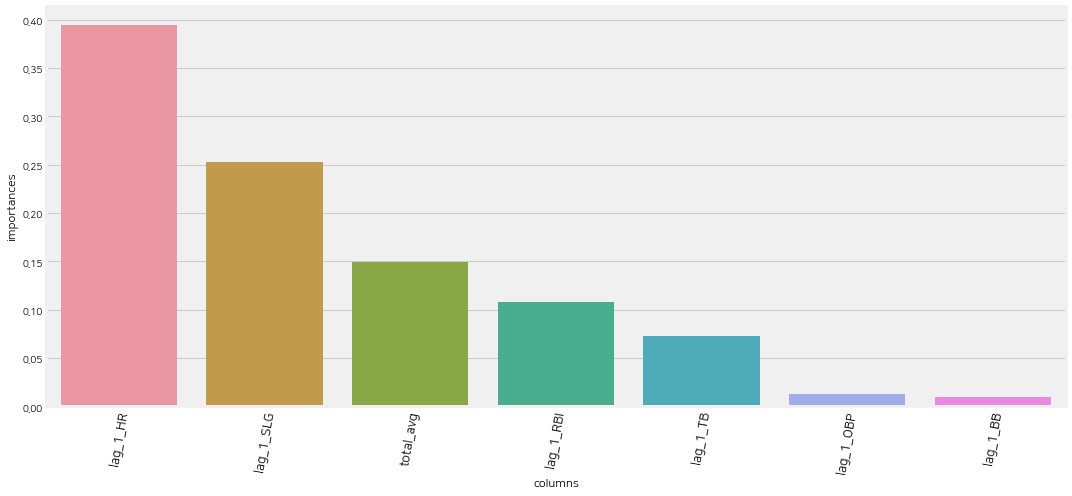

In [21]:
feature_importance = GB_reg.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':train_X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

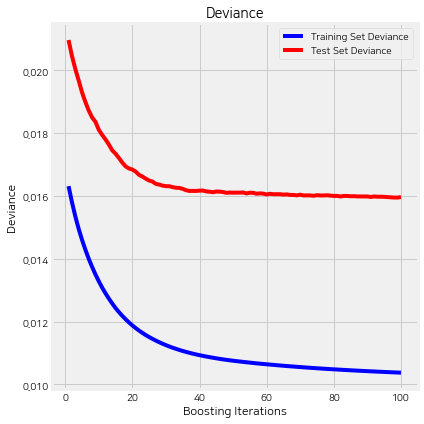

In [22]:
#시각화
test_score = np.zeros((GB_best_param['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GB_reg.staged_predict(test_X)):
    test_score[i] = GB_reg.loss_(test_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(GB_best_param['n_estimators']) + 1, GB_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(GB_best_param['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [23]:
# Training classifiers
reg1 = GradientBoostingRegressor(**GB_best_param) #best_param : 아래의 gridsearch로 찾은 것
reg2 = RandomForestRegressor(n_estimators=100)
reg3 = LinearRegression()

reg1.fit(train_X, train_y,sample_weight=train['AB'])
reg2.fit(train_X, train_y,sample_weight=train['AB'])
reg3.fit(train_X, train_y,sample_weight=train['AB'])

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg = ereg.fit(train_X, train_y)

mse = mean_squared_error(test_y, ereg.predict(test_X),sample_weight=test['AB'])

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(mse**0.5))

The mean squared error (MSE) on test set: 0.0129
The Root mean squared error (RMSE) on test set: 0.1137


## 1.4. Voting Regressor

In [24]:
OPS = ereg.predict(test_X)

In [25]:
# 20개의 데이터에 대해 먼저 test
xt = train_X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

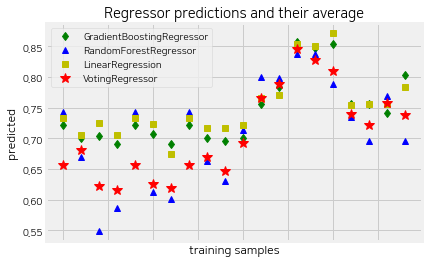

In [26]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

# 2. OBP 예측

In [27]:
# train test set 설정
#train = regular.loc[regular['year']<=2017]
train=regular.loc[(regular['year']>=2015)&(regular['year']<=2017)]
test=regular.loc[regular['year']==2018]

## 2.1. 변수 선택

In [28]:
#OBP
input_var = ['lag_1_2B','lag_1_RBI','lag_1_1B','lag_1_R','lag_1_TB',
            'lag_1_H','lag_1_BB','total_avg','lag_1_SLG','lag_1_AB']

In [29]:
train_X = train[input_var]
train_y = train['OBP']

test_X = test[input_var]
test_y = test['OBP']

In [30]:
#결측치 처리
train_X = train_X.fillna(-1)
train_y = train_y.fillna(-1)

test_X = test_X.fillna(-1)
test_y = test_y.fillna(-1)

## 2.2. GridsearchCV로 최적 파라메터값 찾기

In [31]:
# 시도해 볼 파라메터 값들의 조합들 설정
GB_param_grid = {'n_estimators': [10,50,100],
          'max_depth': [1,2,3,4],
          'min_samples_split': [2,3,5],
          'learning_rate': [0.08,0.1],
          'loss': ['ls']}

In [32]:
grid_search = GridSearchCV(GradientBoostingRegressor(), GB_param_grid, 
                            cv=2, 
                            scoring='neg_mean_squared_error', #neg = negative(음수), GridSearchCV는 SCORE가 높은 것을 산출하기 때문에 mse같은 경우는 음수를 붙여줘야함. 
                            verbose=3)

In [33]:
grid_search.fit(train_X, train_y)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10, score=-0.003, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10, score=-0.003, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=50, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=50 
[C

[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=50, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=100, score=-0.003, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=100, score=-0.002, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=10, score=-0.003, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=10, score=-0.002, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=3, n_estimators=50 
[

[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=50, score=-0.002, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=100, score=-0.003, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=100, score=-0.002, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10, score=-0.003, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=10, score=-0.002, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=3, min_samples_split=2, n_estimators=50 
[CV]  learn

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.4s finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.08, 0.1], 'loss': ['ls'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [34]:
# 찾은 best parametr들을 'GB_best_param'에 지정
GB_best_param =grid_search.best_params_

In [35]:
GB_best_param 

#{'learning_rate': 0.08,
#'loss': 'ls',
#'max_depth': 2,
#'min_samples_split': 2,
#'n_estimators': 50}

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [36]:
grid_search.best_score_

-0.002197556525136096

## 2.3. GradientBoositngRegressor로 예측하기

In [37]:
GB_reg = GradientBoostingRegressor(**GB_best_param)
GB_reg.fit(train_X, train_y,sample_weight=train['AB'])
OBP = GB_reg.predict(test_X)

mse = mean_squared_error(test_y, GB_reg.predict(test_X),sample_weight=test['AB'])
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(mse**0.5))

The mean squared error (MSE) on test set: 0.0014
The Root mean squared error (RMSE) on test set: 0.0370


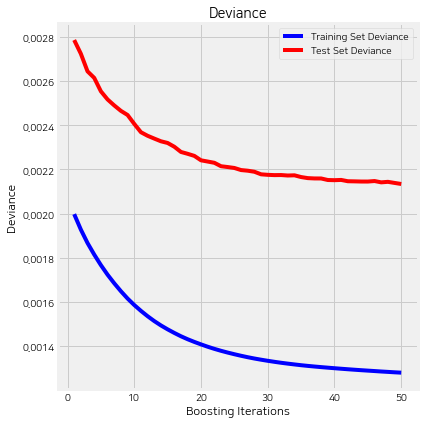

In [38]:
#시각화
test_score = np.zeros((GB_best_param['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GB_reg.staged_predict(test_X)):
    test_score[i] = GB_reg.loss_(test_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(GB_best_param['n_estimators']) + 1, GB_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(GB_best_param['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

## 2.4. Voting Regressor

In [39]:
# Training classifiers
reg1 = GradientBoostingRegressor(**GB_best_param) #best_param : 아래의 gridsearch로 찾은 것
reg2 = RandomForestRegressor(n_estimators=100)
reg3 = LinearRegression()

reg1.fit(train_X, train_y,sample_weight=train['AB'])
reg2.fit(train_X, train_y,sample_weight=train['AB'])
reg3.fit(train_X, train_y,sample_weight=train['AB'])

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg = ereg.fit(train_X, train_y)

mse = mean_squared_error(test_y, ereg.predict(test_X),sample_weight=test['AB'])

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(mse**0.5))

The mean squared error (MSE) on test set: 0.0013
The Root mean squared error (RMSE) on test set: 0.0364


In [40]:
OBP = ereg.predict(test_X)

In [41]:
# 20개의 데이터에 대해 먼저 test
xt = train_X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

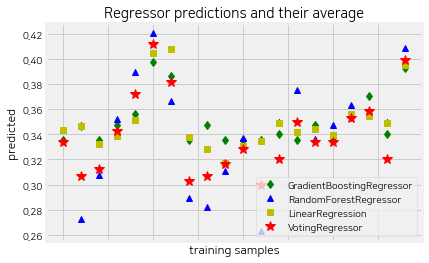

In [42]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

# 3. SLG 예측

In [43]:
# train test set 설정
#train = regular.loc[regular['year']<=2017]
train=regular.loc[(regular['year']>=2015)&(regular['year']<=2017)]
test=regular.loc[regular['year']==2018]

In [44]:
#결측치 처리
train = train.fillna(-1)
test = test.fillna(-1)

## 3.1. 변수 선택

In [45]:
#SLG
input_var = ['lag_1_AB','lag_1_BB','lag_1_R','lag_1_H','lag_1_2B',
            'lag_1_OBP','lag_1_TB','total_avg','lag_1_RBI','lag_1_HR']

In [46]:
train_X = train[input_var]
train_y = train['SLG']

test_X = test[input_var]
test_y = test['SLG']

## 3.2. GridsearchCV로 최적 파라메터값 찾기

In [47]:
# 시도해 볼 파라메터 값들의 조합들 설정
GB_param_grid = {'n_estimators': [10,50,100],
          'max_depth': [1,2,3,4],
          'min_samples_split': [2,3,5],
          'learning_rate': [0.08,0.1],
          'loss': ['ls']}

In [48]:
grid_search = GridSearchCV(GradientBoostingRegressor(), GB_param_grid, 
                            cv=2, 
                            scoring='neg_mean_squared_error', #neg = negative(음수), GridSearchCV는 SCORE가 높은 것을 산출하기 때문에 mse같은 경우는 음수를 붙여줘야함. 
                            verbose=3)

In [49]:
grid_search.fit(train_X, train_y)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10, score=-0.009, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=10, score=-0.008, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50, score=-0.009, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=50, score=-0.007, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=50, score=-0.007, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100, score=-0.008, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=3, n_estimators=100, score=-0.007, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10, score=-0.009, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=10, score=-0.008, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=1, min_samples_split=5, n_estimators=50 
[

[CV]  learning_rate=0.08, loss=ls, max_depth=3, min_samples_split=5, n_estimators=50, score=-0.007, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=3, min_samples_split=5, n_estimators=100, score=-0.010, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=3, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.08, loss=ls, max_depth=3, min_samples_split=5, n_estimators=100, score=-0.007, total=   0.1s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=10, score=-0.009, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=10 
[CV]  learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=10, score=-0.008, total=   0.0s
[CV] learning_rate=0.08, loss=ls, max_depth=4, min_samples_split=2, n_estimators=50 
[

[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=50, score=-0.009, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=50 
[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=50, score=-0.007, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=100, score=-0.009, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=100 
[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=3, n_estimators=100, score=-0.007, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=10 
[CV]  learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=10, score=-0.009, total=   0.0s
[CV] learning_rate=0.1, loss=ls, max_depth=2, min_samples_split=5, n_estimators=10 
[CV]  learn

[CV]  learning_rate=0.1, loss=ls, max_depth=4, min_samples_split=5, n_estimators=100, score=-0.011, total=   0.1s
[CV] learning_rate=0.1, loss=ls, max_depth=4, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, min_samples_split=5, n_estimators=100, score=-0.009, total=   0.1s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.5s finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.08, 0.1], 'loss': ['ls'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [50]:
# 찾은 best parametr들을 'GB_best_param'에 지정
GB_best_param =grid_search.best_params_

In [51]:
GB_best_param

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [52]:
grid_search.best_score_

-0.007783699549279051

## 3.3. GradientBoositngRegressor로 예측하기

In [53]:
GB_reg = GradientBoostingRegressor(**GB_best_param)
GB_reg.fit(train_X, train_y,sample_weight=train['AB'])
SLG = GB_reg.predict(test_X)

mse = mean_squared_error(test_y, GB_reg.predict(test_X),sample_weight=test['AB'])

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(mse**0.5))

The mean squared error (MSE) on test set: 0.0062
The Root mean squared error (RMSE) on test set: 0.0784


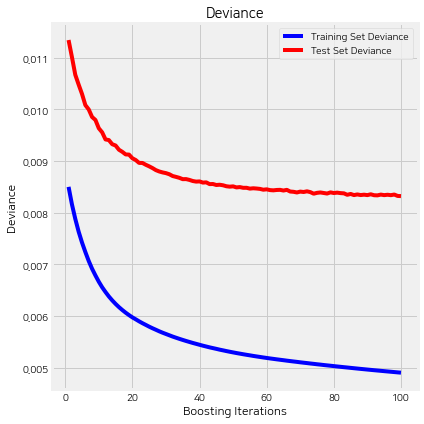

In [54]:
#시각화
test_score = np.zeros((GB_best_param['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GB_reg.staged_predict(test_X)):
    test_score[i] = GB_reg.loss_(test_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(GB_best_param['n_estimators']) + 1, GB_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(GB_best_param['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

## 3.4. Voting Regressor

In [55]:
# Training classifiers
reg1 = GradientBoostingRegressor(**GB_best_param) #best_param : 아래의 gridsearch로 찾은 것
reg2 = RandomForestRegressor(n_estimators=100)

reg1.fit(train_X, train_y,sample_weight=train['AB'])
reg2.fit(train_X, train_y,sample_weight=train['AB'])

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg = ereg.fit(train_X, train_y)

mse = mean_squared_error(test_y, ereg.predict(test_X),sample_weight=test['AB'])

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(mse**0.5))

The mean squared error (MSE) on test set: 0.0071
The Root mean squared error (RMSE) on test set: 0.0842


In [56]:
SLG = ereg.predict(test_X)

In [57]:
# 20개의 데이터에 대해 먼저 test
xt = train_X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = ereg.predict(xt)

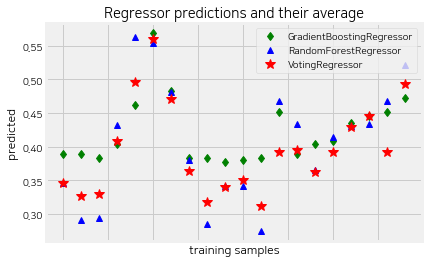

In [58]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()